# HOME ASSIGNMENT #5: BIGQUERY SQL & PYTHON PANDAS

**Mục đích của bài Assignment**
> *  Upload Data từ Google Spreadsheet lên BigQuery và thao tác data với SQL
*  Thao tác với data bằng Pandas
*   `[Optional]` Data Visualization on Python

**Các kiến thức áp dụng**
* Slack API, JSON to DataFrame
* Google Spreadsheet to BigQuery
* SQL
* Python Pandas

**Lời Khuyên**
* Đây là bài tập nhẹ nhàng hơn các tuần trước
* Các bạn dành thời gian ôn lại và xâu chuỗi kiến thức

# TODO 1: BIGQUERY & SQL
* Làm theo Lab của Week 5: [HERE](https://anhdang.gitbook.io/datacracy/atom/5-sql-and-database-design/5.2-lab-upload-data-tu-google-sheet-to-bigquery)

In [7]:
# Import Library
import requests #-> Để gọi API
import re #-> Để xử lý data dạng string
from datetime import datetime as dt #-> Để xử lý data dạng datetime
import gspread #-> Để update data lên Google Spreadsheet
from gspread_dataframe import set_with_dataframe #-> Để update data lên Google Spreadsheet
import pandas as pd #-> Để update data dạng bản
import numpy as np
import json 
from oauth2client.service_account import ServiceAccountCredentials #-> Để nhập Google Spreadsheet Credentials
import os

In [5]:
# (1) Code để pull Slack Data
with open('env_variable.json', 'r') as j:
    json_data = json.load(j)

In [11]:
os.environ['SLACK_BEARER_TOKEN'] = json_data['SLACK_BEARER_TOKEN'] 
endpoint2 = "https://slack.com/api/conversations.list"
data = {'types': 'public_channel,private_channel'} # -> CHECK: API Docs https://api.slack.com/methods/conversations.list/test
response_json = requests.post(endpoint2, headers=headers, data=data).json() 
channel_dat = response_json['channels']

channel_dict = {'channel_id':[], 'channel_name':[], 'is_channel':[],'creator':[],'created_at':[],'topics':[],'purpose':[],'num_members':[]}
for i in range(len(channel_dat)):
    channel_dict['channel_id'].append(channel_dat[i]['id'])
    channel_dict['channel_name'].append(channel_dat[i]['name'])
    channel_dict['is_channel'].append(channel_dat[i]['is_channel'])
    channel_dict['creator'].append(channel_dat[i]['creator'])
    channel_dict['created_at'].append(dt.fromtimestamp(float(channel_dat[i]['created'])))
    channel_dict['topics'].append(channel_dat[i]['topic']['value'])
    channel_dict['purpose'].append(channel_dat[i]['purpose']['value'])
    channel_dict['num_members'].append(channel_dat[i]['num_members'])

channel_df = pd.DataFrame(channel_dict) 
channel_df = channel_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
channel_df.head()

,channel_id,channel_name,is_channel,creator,created_at,topics,purpose,num_members
0,C01B4PVGLVB,general,True,U01BE2PR6LU,2020-09-23 17:25:03,NaN,This is the one channel that will always inclu...,65
1,C01BYH7JHB5,contents,True,U01BE2PR6LU,2020-10-05 14:28:09,NaN,NaN,13
2,C01CAMNCJJV,branding-design,True,U01AVDY7JET,2020-10-05 10:16:30,NaN,NaN,9
3,C01U6P7LZ8F,atom-assignment1,True,U01BE2PR6LU,2021-04-17 14:00:04,Assigment#1 - Python Basics &amp; Spreadsheet ...,Where learners submit assignments and give rev...,44
4,C01UL6K1C7L,atom-week1,True,U01BE2PR6LU,2021-04-17 00:44:32,TOPIC: Data Strategy. Metrics Design. Spreadsh...,TOPIC: Data Strategy. Metrics Design. Spreadsh...,43


In [15]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name(
    'clear-apogee-265809-1309d5ecf61d.json', scope)
gc = gspread.authorize(credentials)
print("DONE!")

DONE!


In [33]:
# ACCES GOOGLE SHEET
sheet_index_no = 2
spreadsheet_key = '19ctZvMgvT2ydbnP3QXmPrSm2p70B-R0_SWVgqTouhXw' # input SPREADSHEET_KEY HERE
sh = gc.open_by_key(spreadsheet_key)
worksheet = sh.get_worksheet(sheet_index_no) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, channel_df) 



In [17]:
endpoint = "https://slack.com/api/users.list"
headers = {"Authorization": "Bearer {}".format(json_data['SLACK_BEARER_TOKEN'])}
response_json = requests.post(endpoint, headers=headers).json() 
# response_json
user_dat = response_json['members']

## Convert to CSV
user_dict = {'user_id':[],'name':[],'display_name':[],'real_name':[],'title':[],'is_bot':[]}
for i in range(len(user_dat)):
    user_dict['user_id'].append(user_dat[i]['id'])
    user_dict['name'].append(user_dat[i]['name'])
    user_dict['display_name'].append(user_dat[i]['profile']['display_name'])
    user_dict['real_name'].append(user_dat[i]['profile']['real_name_normalized'])
    user_dict['title'].append(user_dat[i]['profile']['title'])
    user_dict['is_bot'].append(user_dat[i]['is_bot'])

user_df = pd.DataFrame(user_dict) 
user_df = user_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
user_df.head()

,user_id,name,display_name,real_name,title,is_bot
0,USLACKBOT,slackbot,Slackbot,Slackbot,NaN,False
1,U01AT4T75JB,loclexuan26392,Loc Le Xuan,Loc Le Xuan,NaN,False
2,U01AVDY7JET,locle.ds,Loc Le Xuan,Loc Le Xuan,NaN,False
3,U01BE2PR6LU,maianhdang.ftu,MAD,Dặng Huỳnh Mai Anh,Technical Contents,False
4,U01C48T7S1J,huyenhoang.design,Thanh Huyen Hoang,Thanh Huyen Hoang,NaN,False


In [27]:
sh = gc.open_by_key(spreadsheet_key)
worksheet = sh.get_worksheet(1) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, user_df)

In [25]:
endpoint3 = "https://slack.com/api/conversations.history"
msg_dict = {'channel_id':[],'msg_id':[], 'msg_ts':[], 'user_id':[], 'latest_reply':[],'reply_user_count':[],'reply_users':[],'github_link':[]}
for channel_id, channel_name in zip(channel_df['channel_id'], channel_df['channel_name']):
    print('Channel ID: {} - Channel Name: {}'.format(channel_id, channel_name))
    try:
        data = {"channel": channel_id} 
        response_json = requests.post(endpoint3, data=data, headers=headers).json()
        msg_ls = response_json['messages']
        for i in range(len(msg_ls)):
            if 'client_msg_id' in msg_ls[i].keys():
                msg_dict['channel_id'].append(channel_id)
                msg_dict['msg_id'].append(msg_ls[i]['client_msg_id'])
                msg_dict['msg_ts'].append(dt.fromtimestamp(float(msg_ls[i]['ts'])))
                msg_dict['latest_reply'].append(dt.fromtimestamp(float(msg_ls[i]['latest_reply'] if 'latest_reply' in msg_ls[i].keys() else 0))) ## -> No reply: 1970-01-01
                msg_dict['user_id'].append(msg_ls[i]['user'])
                msg_dict['reply_user_count'].append(msg_ls[i]['reply_users_count'] if 'reply_users_count' in msg_ls[i].keys() else 0)
                msg_dict['reply_users'].append(msg_ls[i]['reply_users'] if 'reply_users' in msg_ls[i].keys() else 0) 
                ## -> Censor message contains tokens
                text = msg_ls[i]['text']
                github_link = re.findall('(?:https?://)?(?:www[.])?github[.]com/[\w-]+/?', text)
                msg_dict['github_link'].append(github_link[0] if len(github_link) > 0 else np.nan)
    except:
        print('====> '+ str(response_json))
        
msg_df = pd.DataFrame(msg_dict)
msg_df = msg_df.replace('', np.nan) # -> replace khoảng trắng bằng giá trị NULL (nan)
msg_df.tail()

Channel ID: C01B4PVGLVB - Channel Name: general
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01BYH7JHB5 - Channel Name: contents
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01CAMNCJJV - Channel Name: branding-design
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01U6P7LZ8F - Channel Name: atom-assignment1
Channel ID: C01UL6K1C7L - Channel Name: atom-week1
Channel ID: C01ULCHGN75 - Channel Name: atom-general
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C020VMT58JK - Channel Name: topics-data-analytics
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C0213MNH9L6 - Channel Name: topics-python
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C0213N56M2A - Channel Name: topics-materials
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C021FSDN7LJ - Channel Name: atom-assignment2
Channel ID: C021KLB0DSB - Channel Name: discuss-group3
Channel ID: C021KLB90GP - Channel Name: discuss-group4
Channel ID: C0220

,channel_id,msg_id,msg_ts,user_id,latest_reply,reply_user_count,reply_users,github_link
270,C023UJGMDND,8d52e739-7903-44a8-aa9b-150ce15d4b08,2021-06-02 23:10:19.007100,U01UMJ36QD9,1970-01-01 07:00:00,0,0,https://github.com/Quan030994/
271,C023UJGMDND,15096040-5001-4884-aeeb-92ee5bcad3e3,2021-06-02 17:34:22.003500,U01UTGT8CVA,1970-01-01 07:00:00,0,0,https://github.com/ngttnguyen/
272,C023UJGMDND,a8edeb55-8d76-4ea7-8ea0-3111840ffb44,2021-05-30 08:55:42.001400,U01BE2PR6LU,1970-01-01 07:00:00,0,0,https://github.com/anhdanggit/
273,C0245PZUFSL,2ccae5b9-902c-4fff-bf08-e84d558537be,2021-06-02 19:10:03.003400,U01BE2PR6LU,1970-01-01 07:00:00,0,0,NaN
274,C0245PZUFSL,a6e46b2c-00a6-43f3-acb2-9fb221d25d4b,2021-06-02 19:09:43.003200,U01BE2PR6LU,1970-01-01 07:00:00,0,0,NaN


In [28]:
worksheet = sh.get_worksheet(2) #-> 0 - first sheet, 1 - second sheet etc. 

# APPEND DATA TO SHEET
set_with_dataframe(worksheet, msg_df)

In [29]:
dtc_groups = pd.read_csv('datacracy_groups.csv')
dtc_groups.head()

,name,DataCracy_role
0,slackbot,BTC
1,loclexuan26392,BTC
2,locle.ds,BTC
3,maianhdang.ftu,BTC
4,huyenhoang.design,BTC


In [30]:
worksheet = sh.get_worksheet(3)
set_with_dataframe(worksheet, dtc_groups)

In [34]:
!pip install pillow
from PIL import Image

Lab 5 example


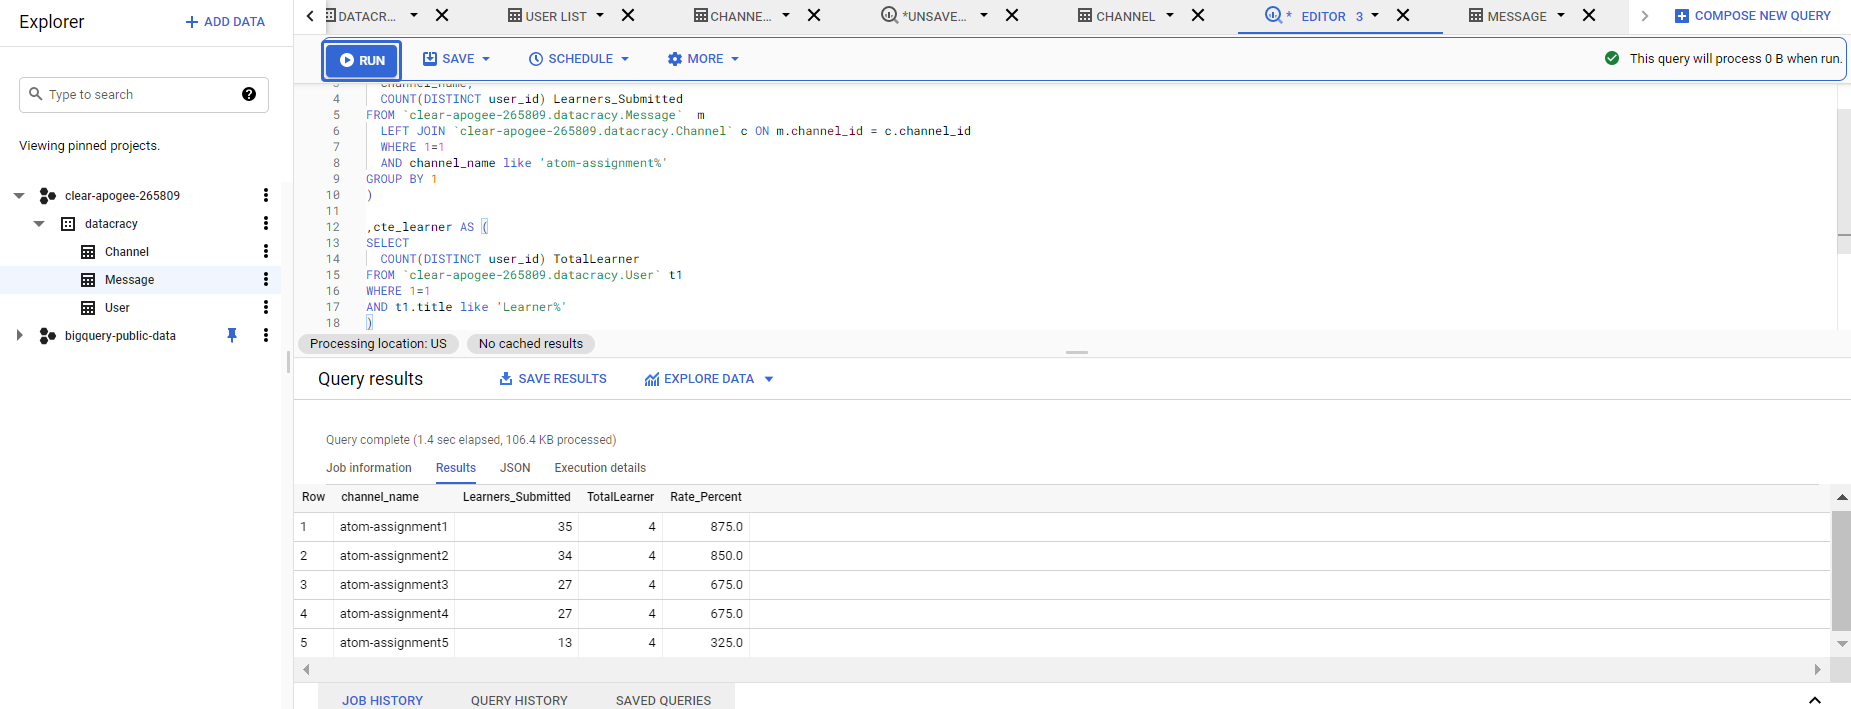

In [35]:
lab5 = Image.open('lab5.png')
print('Lab 5 example')
lab5

# TODO 2: Python Pandas
[Kaggle](https://www.kaggle.com/) là cộng đồng lớn nhất thế giới về Data Science với các cuộc thi/thử thách ML, các công cụ và tài liệu để học và phát triển kỹ năng
* Tạo account của bạn trên Kaggle
* Coi tutorial và làm 6 sets bài tập trên Kaggle [HERE](https://www.kaggle.com/learn/pandas)
* Bạn có thể làm bài trực tiếp trên Kaggle (cũng là dạng notebook online như Colab). Toàn bộ notebook sẽ lưu trên phần Code trong Profile Account của bạn
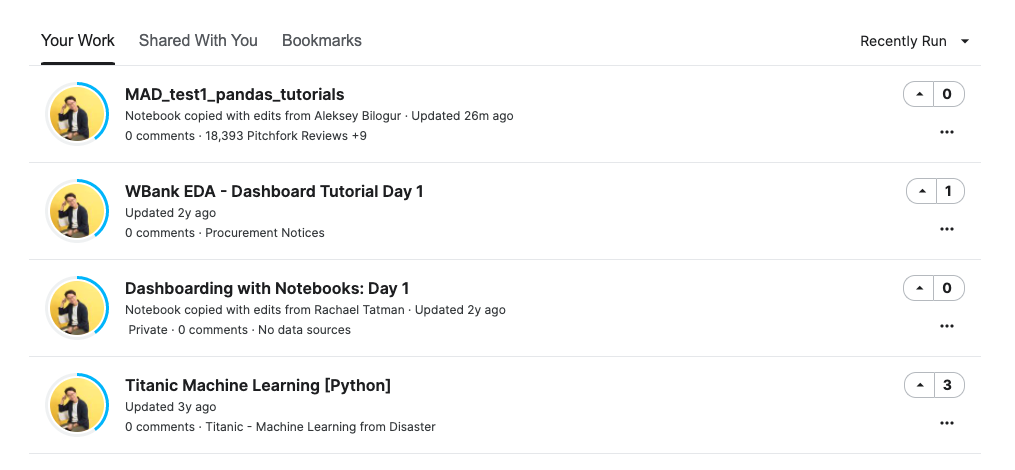

In [3]:
# Copy các link Kaggle sau:
## 1. Link tới Kaggle Account của bạn -----> https://www.kaggle.com/danhpcv
## 2. Link tới các bài tập
## Pandas 1: --->https://www.kaggle.com/danhpcv/exercise-creating-reading-and-writing
## Pandas 2: --->https://www.kaggle.com/danhpcv/exercise-indexing-selecting-assigning
## Pandas 3: --->https://www.kaggle.com/danhpcv/exercise-summary-functions-and-maps
## Pandas 4: --->https://www.kaggle.com/danhpcv/exercise-grouping-and-sorting
## Pandas 5: --->https://www.kaggle.com/danhpcv/exercise-data-types-and-missing-values
## Pandas 6: --->https://www.kaggle.com/danhpcv/exercise-renaming-and-combining

# TODO 3: Python Pandas 
Trở lại TODO7 [Assignment#4](https://github.com/anhdanggit/atom-assignments/blob/main/assignment_4/home_assignment_4.ipynb) (nếu bạn chưa hoàn thành)

# TODO 4 (OPTIONAL): Python Data Viz
Coi tutorial và làm nhiều nhất có thể các sets bài tập trên [Kaggle Data Visualization](https://www.kaggle.com/learn/data-visualization)

In [ ]:
# Copy Link tới các bài tập
## DataViz 1: --->
## DataViz 2: --->
## DataViz 3: --->
## DataViz 4: --->
## DataViz 5: --->
## DataViz 6: --->
## DataViz 7: --->